In [27]:
# Import Packages
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
import numpy as np
import warnings; warnings.simplefilter('ignore')

In [28]:
def parser(s):
    return datetime.strptime(s, "%Y-%m-%d")

In [29]:
# Load Data
data = pd.read_csv('/datc/parcel/notebooks/data/postnl/20201014_300_klanten.csv', parse_dates=[0])

In [30]:
cust_filter = data['cust_id'] == 'klant_69'
date_filter = data['procesdag'].dt.dayofweek <= 4
data = data.where(date_filter & cust_filter).dropna()

data['procesdag']=pd.to_datetime(data['procesdag'])
data = data.set_index(data.procesdag, drop=True)
data = data['2016-01-01':'2020-01-01']

In [31]:
data.drop(['procesdag'], axis='columns', inplace=True)
data.drop(['aantal_pakketten_volgende_dag'], axis='columns', inplace=True)

In [32]:
data.head()

,cust_id,aantal_pakketten,validation_column
procesdag,,,
2016-01-01,klant_69,0.0,train
2016-01-04,klant_69,330.0,train
2016-01-05,klant_69,301.0,train
2016-01-06,klant_69,391.0,train
2016-01-07,klant_69,301.0,train


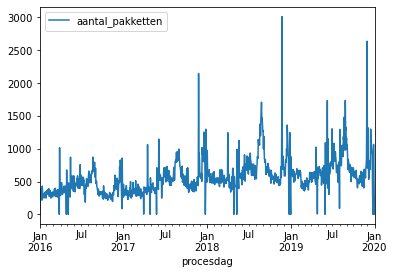

In [33]:
data.plot()

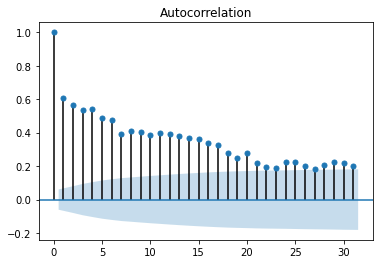

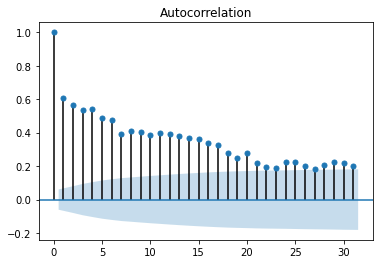

In [34]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['aantal_pakketten'])

In [35]:
data_diff = data['aantal_pakketten'].diff()[1:]
data_diff.head()

procesdag
2016-01-04    330.0
2016-01-05    -29.0
2016-01-06     90.0
2016-01-07    -90.0
2016-01-08    -25.0
Name: aantal_pakketten, dtype: float64

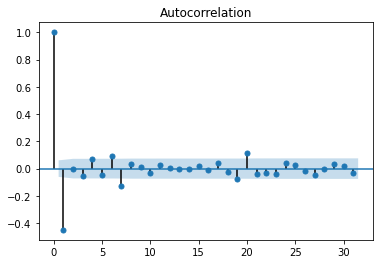

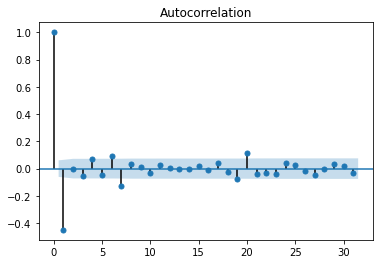

In [36]:
plot_acf(data_diff)

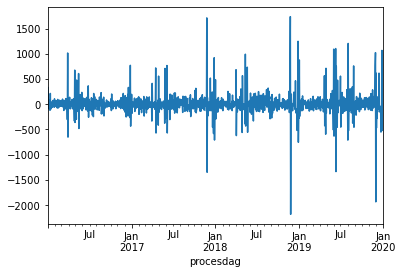

In [37]:
data_diff.plot()

In [38]:
X = data_diff.values
print(X.size)
train = X[0:1022] # 500 training data
test = X[1022:] # 22 testing data
predictions = []

1043


In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score

# Fit ARIMA Model
my_order = (1,0,1)
my_seasonal_order = (0, 1, 1, 12)
fig = plt.figure(figsize=(20,8))
model = SARIMAX(train, order=my_order, seasonal_order=my_seasonal_order)
ax = plt.gca()
results = model.fit()
plt.plot(data_diff)
plt.plot(results.fittedvalues, color='magenta', alpha=1)
plt.grid()
ax.legend(['Actual', 'Forecast'])

ValueError: view limit minimum -36871.25 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [40]:
# Model only with December
fig = plt.figure(figsize=(20,8))
num_points = len(data_diff)
x = results.predict(start=(1021), end=(1043), dynamic=False)

plt.plot(data_diff[:1022])
plt.plot(x, color='magenta')
plt.grid()
plt.xlabel('Datum',fontsize= 18)
plt.ylabel('verschil Aantal Pakketen Vorige Dag',fontsize= 18)
plt.title('Modelsvoorspelling Klant 69',fontsize= 18)
residuals = data_diff - results.fittedvalues
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

ValueError: operands could not be broadcast together with shapes (1043,) (1022,) 

ValueError: view limit minimum -36869.8 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [ ]:
# Model with Difference
diff = data_diff - x
plt.plot(diff, color='red')
plt.xlabel('Datum', fontsize=12)
plt.ylabel('Verschil Werkelijk En Voorspeld', fontsize=12)
plt.title('Verschil Tussen Werkelijk En Voorspeld Klant 69', fontsize=15)
plt.xticks(rotation=45)
plt.grid()

In [ ]:
diff = data_diff - x
plt.plot(data_diff['2019-12-01':'2020-01-01'])
plt.plot(x, color='red')
plt.xlabel('Datum', fontsize=12)
plt.ylabel('Verschil Werkelijk En Voorspeld', fontsize=12)
plt.title('Verschil Tussen Werkelijk En Voorspeld Klant 69', fontsize=15)
plt.xticks(rotation=45)
plt.grid()